# Parametric Blackholes

If you are only interested in exploring the parameter space of AGN emission without simulation data to forward model you can use a `parametric.BlackHole`. Unlike stellar emission the division between a `particle` and a `parametric` `BlackHoles`/`BlackHole` object is much more blurry. However, there are some specific differences to keep in mind:

- A `parametric.BlackHole` can only ever describe a singular black hole. 

- A `parametric.BlackHole`'s "position" (i.e. if making an image) is described by a `PointSource` morphology object rather than coordinates.

- A `parametric.BlackHole` exists in isolation, i.e. it does not interface directly with other parametric components.

See the particle black hole [docs](particle_blackholes.ipynb) for more information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unyt import Msun, yr, Angstrom, deg, K

from synthesizer.dust.attenuation import PowerLaw
from synthesizer.dust.emission import Greybody
from synthesizer.blackhole_emission_models import UnifiedAGN
from synthesizer.parametric import BlackHole
from synthesizer.sed import plot_spectra

# Set a random number seed to ensure consistent results
np.random.seed(42)

First we need to initialise our `BlackHole` object with the parameters that will be needed to compute spectra.

In [2]:
blackhole = BlackHole(
    mass=1e8 * Msun,
    inclination=60 * deg,
    accretion_rate=1 * Msun / yr,
    metallicity=0.01,
)

Like other `synthesizer` objects we can get more information using the `print` command.

In [3]:
print(blackhole)

--------------------------------------------------------------------------------
                                SUMMARY OF BLACKHOLE                                
Number of blackholes: 1 
mass: 100000000.0 
accretion_rate: 1.0 
accretion_rate_eddington: 0.451 
bolometric_luminosity: 5.662975168128828e+45 
eddington_ratio: 0.451 
bb_temperature: 224000.0 
eddington_luminosity: 1.2570000000000002e+46 
epsilon: 0.1 
inclination: 60 
cosine_inclination: 0.5 



### Generating spectral energy distribution

We can generate spectra by passing a blackhole emission model (e.g. the `UnifiedAGN` model described in [emission_models](emission_models.ipynb)) to the spectra creation method (`get_intinsic_spectra`).

In [4]:
# define the emission model
grid_dir = "../../../tests/test_grid/"
emission_model = UnifiedAGN(
    disc_model="test_grid_agn", photoionisation_model="", grid_dir=grid_dir
)

# get the spectra assuming this emission model
spectra = blackhole.get_spectra_intrinsic(
    emission_model, grid_assignment_method="ngp"
)
print(spectra)

{'disc_incident': <synthesizer.sed.Sed object at 0x7f77306b6950>, 'disc_transmitted': <synthesizer.sed.Sed object at 0x7f777a359870>, 'disc_escaped': <synthesizer.sed.Sed object at 0x7f77306b7a60>, 'disc': <synthesizer.sed.Sed object at 0x7f77306b7070>, 'blr': <synthesizer.sed.Sed object at 0x7f77306b7910>, 'nlr': <synthesizer.sed.Sed object at 0x7f77306b7160>, 'torus': <synthesizer.sed.Sed object at 0x7f77306b78b0>, 'intrinsic': <synthesizer.sed.Sed object at 0x7f77306b78e0>}


/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


We can plot the resulting spectra using the `plot_spectra` method.

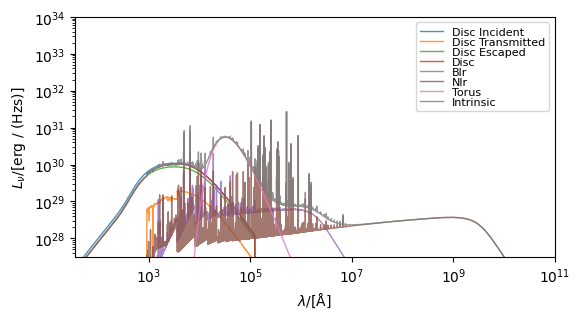

In [5]:
fig, ax = blackhole.plot_spectra(
    show=True, ylimits=(10**27.5, 10**34.0), figsize=(6, 4)
)

## Including dust attenuation

We can also include attenuation and emission from diffuse dust along the line of sight. To do so we simply provide a `dust_cruve` and `dust_emission_model` to `get_spectra_attenuated`. This same process can be used on `particle.BlackHoles` too.

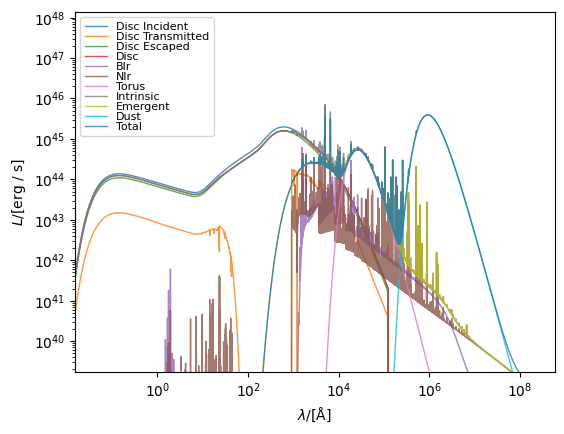

In [6]:
tau_v = 0.5
dust_curve = PowerLaw(slope=-1.0)
dust_emission_model = Greybody(30 * K, 1.2)

# get the spectra assuming this emission model
spectra = blackhole.get_spectra_attenuated(
    emission_model,
    tau_v=tau_v,
    dust_curve=dust_curve,
    dust_emission_model=dust_emission_model,
)

fig, ax = blackhole.plot_spectra(quantity_to_plot="luminosity", figsize=(6, 6))